In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data["target"] = iris['target']
x = iris['data'][:100,0]
y = iris['data'][:100,1]
labels = iris['target'][:100]
x -= np.mean(x)
y -= np.mean(y)
x = x.reshape(len(x),1)
y = y.reshape(len(y),1)
X = np.concatenate((x, y), axis=1)
iris_data


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.371,0.401,1.4,0.2,0
1,-0.571,-0.099,1.4,0.2,0
2,-0.771,0.101,1.3,0.2,0
3,-0.871,0.001,1.5,0.2,0
4,-0.471,0.501,1.4,0.2,0
...,...,...,...,...,...
145,6.700,3.000,5.2,2.3,2
146,6.300,2.500,5.0,1.9,2
147,6.500,3.000,5.2,2.0,2
148,6.200,3.400,5.4,2.3,2


In [2]:
def MSE(W, b, X, labels, reg):
  # W = Weight Matrix of size 2 X 1
  # b = bias (float)
  # labels = y_true
  y_pred = np.dot(X, W) + b # compute scores
  sq_error = np.square(np.subtract(y_pred,labels))
  mse_loss = 0.5* (sq_error.mean())
  log_loss = (reg/2)* np.dot(np.transpose(W), W)
  loss = mse_loss + log_loss
  return loss

def grad_MSE(W, b, X, labels, reg):
  # W = Weight Matrix of size 2 X 1
  # b = bias (float)
  # labels = y_true
  num_samples = X.shape[0]
  y_pred = np.dot(X, W) + b
  dw = ((1 / num_samples)* np.dot(X.T,(y_pred - labels))) + (reg * W)
  db = (1 / num_samples) * np.sum(y_pred - labels)
  # print("dw = ", dw)
  # print("db = ", db)
  return dw, db

In [3]:
def grad_descent(W, b, X, labels, alpha, reg, stop_criteria, max_iterations=100):
  loss_list = []

  # Implement the Gradient Descent algorithm
  if (( MSE(W, b, X, labels, reg=0.1) > stop_criteria) or (stop_criteria != 0)):
    for i in range(max_iterations):
      dw, db = grad_MSE(W, b, X, labels, reg)
      training_loss = MSE(W, b, X, labels, reg=0.1)
      loss_list.append(training_loss)
      W -= alpha * dw
      b -= alpha * db
      # print(training_loss)
  return W, b, loss_list

<ipython-input-5-125921c13790>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X1, X2, Y, cmap=plt.cm.get_cmap('YlGn'))


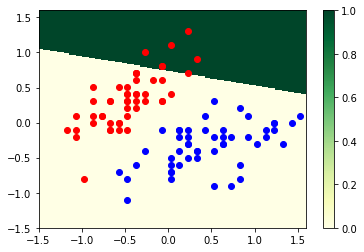

In [5]:
'''
Linear Regression Plot before training
'''
def plot_LR(X, W, b, num_points = 200, Thereshold = 0.5):
  x1s = np.linspace(-1.5, 1.6, num_points)
  x2s = np.linspace(-1.5, 1.6, num_points)

  points = np.transpose([np.tile(x1s, len(x2s)), np.repeat(x2s, len(x1s))])
  # print(points.shape)
  # b = b.reshape(num_points,)
  z = np.dot(points, W) + b
  Y = (z > Thereshold).astype(int).reshape(num_points, num_points)
  X1, X2 = np.meshgrid(x1s, x2s)

  plt.pcolormesh(X1, X2, Y, cmap=plt.cm.get_cmap('YlGn'))
  plt.colorbar()
  num_data = max(X.shape)
  plt.scatter(X[:num_data//2, 0], X[:num_data//2, 1], color='red')
  plt.scatter(X[num_data//2:, 0], X[num_data//2:, 1], color='blue')


# Plot with random weights
W = np.random.sample(2)
b = 0
plot_LR(X, W, b, num_points = 200, Thereshold = 0.5)

<ipython-input-5-125921c13790>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X1, X2, Y, cmap=plt.cm.get_cmap('YlGn'))


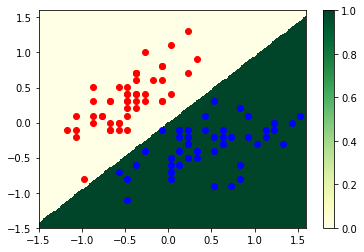

In [6]:
# Plot with Trained weights and bias
W = np.random.sample(2)
b = 0
dw, db = grad_MSE(W, b, X, labels, reg=0.1)
W, b, loss_list = grad_descent(W, b, X, labels, alpha = 1, reg = 0.1, stop_criteria = 1, max_iterations=100)
# W.shape
plot_LR(X, W, b, num_points = 200, Thereshold = 0.5)

In [7]:
W = np.array([0.5,0.2])
b = 0.6
loss = MSE(W, b, X, labels, reg=0.1)
dw = grad_MSE(W, b, X, labels, reg=0.1)

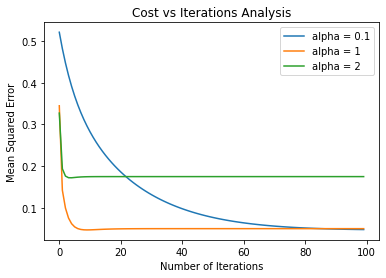

In [8]:
iter = 100
for a in [0.1, 1, 2]:
  W = np.random.sample(2)
  b = 0
  dw, db = grad_MSE(W, b, X, labels, reg=0)
  W, b, loss_list= grad_descent(W, b, X, labels, alpha = a, reg = 0, stop_criteria = 1, max_iterations=iter)
  x = range(iter)
  y = loss_list
  plt.plot(range(iter), y, label = 'alpha = ' + str(a))
plt.legend(loc= 'best')
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Cost vs Iterations Analysis')
plt.show()

In [9]:
def crossEntropyLoss(W, b, X, labels, reg):
  y_pred = np.dot(X, W) + b
  y_pred = 1 / (1 + np.exp(-y_pred))
  ce = -np.mean(labels * np.log(y_pred) + (1 - labels) * np.log(1 - y_pred))
  loss_ce = np.mean(ce) + reg * np.sum(W * W)
  return loss_ce

def gradCE(W, b, X, labels, reg):
  num_samples = X.shape[0]
  y_pred = np.dot(X, W) + b
  y_pred = 1 / (1 + np.exp(-y_pred))
  dw = ((1/num_samples) * np.dot(X.T, (y_pred -labels))) + reg * W
  db = (1/num_samples) * np.sum(y_pred - labels)
  return dw, db

In [10]:
def grad_descent(W, b, X, labels, alpha, reg, stop_criteria, max_iterations, lossType = "None"):
  loss_list = list()
# Implement the Gradient Descent algorithm
  for i in range(max_iterations):
    if lossType == "MSE":
      dw, db = grad_MSE(W, b, X, labels, reg)
      loss = MSE(W, b, X, labels, reg)
    elif lossType == "CE":
      dw, db = gradCE(W, b, X, labels, reg)
      loss = crossEntropyLoss(W, b, X, labels, reg)
    if (( loss > stop_criteria) or (stop_criteria != 0)):
      training_loss = loss
      loss_list.append(training_loss)
      W -= alpha * dw
      b -= alpha * db
    # print(training_loss)
  print(loss_list)
  return W, b, loss_list

<ipython-input-11-83a97a3a0fd5>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X1, X2, Y, cmap=plt.cm.get_cmap('YlGn'))


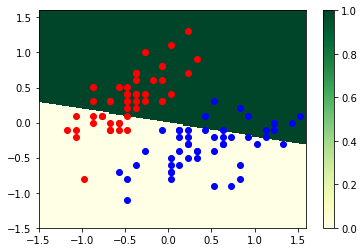

In [11]:
def plot_CE(X, W, b, num_points = 200, Thereshold = 0.5):
  x1s = np.linspace(-1.5, 1.6, num_points)
  x2s = np.linspace(-1.5, 1.6, num_points)

  points = np.transpose([np.tile(x1s, len(x2s)), np.repeat(x2s, len(x1s))])
  # print(points.shape)
  z = np.dot(points, W) + b
  z = 1 / (1 + np.exp(-z))
  Y = (z > Thereshold).astype(int).reshape(num_points, num_points)
  X1, X2 = np.meshgrid(x1s, x2s)

  plt.pcolormesh(X1, X2, Y, cmap=plt.cm.get_cmap('YlGn'))
  plt.colorbar()
  num_data = max(X.shape)
  plt.scatter(X[:num_data//2, 0], X[:num_data//2, 1], color='red')
  plt.scatter(X[num_data//2:, 0], X[num_data//2:, 1], color='blue')

# Plot with random weights
W = np.random.sample(2)
b = 0
plot_CE(X, W, b, num_points = 200, Thereshold = 0.5)

[0.6546543139151286, 0.6099164634736121, 0.5846836931811981, 0.5714353856913025, 0.5654662865255957, 0.5638351359651151, 0.5647047044819653, 0.5669313612799924, 0.5698092822180894, 0.5729099468252561, 0.5759806230909879, 0.5788796929337858, 0.5815352187823336, 0.5839183138269308, 0.5860260208144293, 0.587870338854257, 0.5894712436483468, 0.590852307577336, 0.5920380118441999, 0.5930521561361745, 0.5939169750704674, 0.5946527042600334, 0.5952774268854055, 0.5958070899461644, 0.5962556180503498, 0.5966350782953813, 0.5969558668417414, 0.5972268990523588, 0.5974557924770785, 0.5976490367805597, 0.597812147801114, 0.5979498048645484, 0.5980659716500167, 0.5981640015763283, 0.5982467290235184, 0.5983165478441133, 0.5983754786303798, 0.5984252261402507, 0.5984672281797786, 0.5985026971159588, 0.5985326550644211, 0.5985579636702127, 0.5985793492815028, 0.5985974242079235, 0.5986127046584372, 0.5986256258680274, 0.5986365548477004, 0.5986458011273624, 0.5986536258051951, 0.5986602491691582, 0.

<ipython-input-11-83a97a3a0fd5>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X1, X2, Y, cmap=plt.cm.get_cmap('YlGn'))


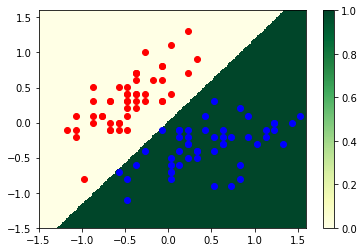

In [12]:
# Plot with Trained Weights (CrossEntropyLoss)
W = np.random.sample(2)
b = 0
W, b, loss_list = grad_descent(W, b, X, labels, alpha=1, reg=0.1, stop_criteria=1, max_iterations=100, lossType = "CE")
plot_CE(X, W, b, num_points = 200, Thereshold = 0.5)

[0.7516455541071012, 0.6695095072437219, 0.6022160011547915, 0.5467125840789167, 0.5005114413042233, 0.46165803314859816, 0.42864279692568524, 0.4003059157141307, 0.3757546585418261, 0.3542978063326902, 0.33539578754929456, 0.31862349117508243, 0.30364273215498316, 0.290181866698976, 0.27802064058231396, 0.26697885471825766, 0.25690782010860147, 0.24768386079824473, 0.23920333042302905, 0.2313787559407833, 0.22413582766210186, 0.2174110300413002, 0.21114976169799518, 0.20530483207627817, 0.1998352504061317, 0.19470524328885733, 0.1898834524439348, 0.18534227544878867, 0.1810573207506993, 0.17700695459686744, 0.17317192236270101, 0.16953503045523316, 0.16608087781549602, 0.16279562825085972, 0.15966681655067042, 0.15668318269087872, 0.15383452950157486, 0.15111160001998963, 0.14850597142942287, 0.14600996302894492, 0.14361655611808297, 0.14131932403704256, 0.13911237089334882, 0.13699027774341604, 0.13494805519285846, 0.1329811015405478, 0.13108516572497841, 0.1292563144425849, 0.127490

Text(0.5, 1.0, 'Cost vs Iterations Analysis')

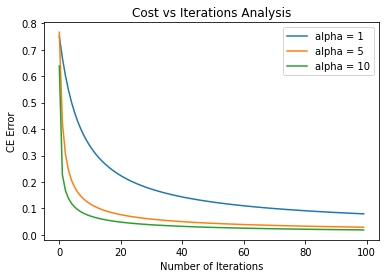

In [13]:
iter = 100
for a in [1, 5, 10]:
  W = np.random.sample(2)
  b = 0
  # dw, db = grad_MSE(W, b, X, labels, reg=0)
  W, b, loss_list = grad_descent(W, b, X, labels, alpha=a, reg=0, stop_criteria=1, max_iterations=iter, lossType = "CE")
  x = range(iter)
  y = loss_list
  plt.plot(x, y, label = 'alpha = ' + str(a))
plt.legend(loc = 'best')
plt.xlabel('Number of Iterations')
plt.ylabel('CE Error')
plt.title('Cost vs Iterations Analysis')

[0.2158824550000002, 0.061723794577076926, 0.045427000605790885, 0.03585129999774823, 0.03005240296461014, 0.0264802037625909, 0.024259095426177314, 0.022871174942590788, 0.022001611153447866, 0.0214560563365295, 0.021113533364729747, 0.020898401159889245, 0.020763253953306884, 0.02067834497809372, 0.020624996312234467, 0.020591476176744235, 0.020570414431377953, 0.020557180578969825, 0.02054886523999905, 0.020543640381441707, 0.02054035739118857, 0.020538294554264543, 0.02053699838914821, 0.02053618395527287, 0.020535672212916255, 0.020535350664097396, 0.020535148621714416, 0.020535021670151855, 0.02053494190124845, 0.02053489177915587, 0.020534860285377453, 0.020534840496537265, 0.020534828062392627, 0.020534820249506605, 0.020534815340348008, 0.020534812255721138, 0.020534810317522835, 0.020534809099672882, 0.020534808334447506, 0.020534807853624843, 0.020534807551504122, 0.020534807361669218, 0.02053480724238811, 0.02053480716743887, 0.02053480712034517, 0.02053480709075426, 0.0205

Text(0.5, 1.0, 'Cost vs Iterations Analysis')

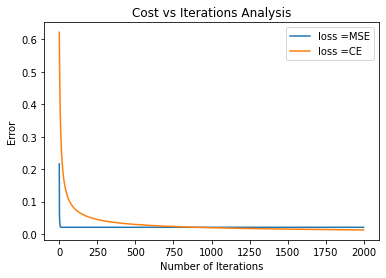

In [14]:
iter = 2000
W =np.array([0.5, 0.2])
b = 0
for a in ['MSE', 'CE']:
  W = np.array([0.5, 0.2])
  b = 0
  # dw, db = grad_MSE(W, b, X, labels, reg=0)
  W, b, loss_list = grad_descent(W, b, X, labels, alpha=1, reg=0, stop_criteria=1, max_iterations=iter, lossType = a)
  x = range(iter)
  y = loss_list
  plt.plot(x, y, label = "loss =" + str(a))
plt.legend(loc = "best")
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.title('Cost vs Iterations Analysis')